In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.gridspec as gridspec

In [7]:
data_path = "/Users/nalindakulathunga/WorkSpaces/TSU/linearity-paper/data_to_plot3"
entropy_file_names = ["entropy_layers_2_alpha_0_1_pfa.npy",
                      "entropy_layers_3_alpha_0_1_pfa.npy",
                      "entropy_layers_4_alpha_0_1_pfa.npy",
                      "entropy_layers_5_alpha_0_1_pfa.npy",
                      "entropy_layers_6_alpha_0_1_pfa.npy"]

perform_file_names = ["performance_layers_2_alpha_0_1_pfa.npy",
                      "performance_layers_3_alpha_0_1_pfa.npy",
                      "performance_layers_4_alpha_0_1_pfa.npy",
                      "performance_layers_5_alpha_0_1_pfa.npy",
                      "performance_layers_6_alpha_0_1_pfa.npy"]

### 1. Investigation of the link between performance of shallow neural networks with their entropy profile

In [8]:
archis=5
min_layers=2
for i in range(archis):
    entropy_file_names[i] = os.path.join(data_path, entropy_file_names[i])
    perform_file_names[i] = os.path.join(data_path, perform_file_names[i])

In [9]:
layer_infor = [str(i+min_layers) for i in range(archis)]
layer_optim_entropy_dict = {layers:np.load(entropy_file_names[ind]) for ind, layers in enumerate(layer_infor)}
layer_optim_perform_dict = {layers:np.load(perform_file_names[ind]) for ind, layers in enumerate(layer_infor)}
layers_str = layer_infor

In [10]:
archi_shapes_2 = [[246, 246], [458, 229], [416, 832]]
archi_shapes_3 = [[246, 246, 246], [458, 229, 114], [208, 416, 832]]
archi_shapes_4 = [[246, 246, 246, 246], [458, 229, 114, 57], [104, 208, 416, 832]]
archi_shapes_5 = [[246, 246, 246, 246, 246], [458, 229, 114, 57, 28], [52, 104, 208, 416, 832]]
archi_shapes_6 = [[246, 246, 246, 246, 246, 246], [458, 229, 114, 57, 28, 14], [26, 52, 104, 208, 416, 832]]
archi_shapes = [archi_shapes_2,archi_shapes_3,archi_shapes_4,archi_shapes_5,archi_shapes_6]

In [11]:
avg_dict = {key:np.sum(val, axis=2)/(ind+2.0) for ind,(key,val) in enumerate(layer_optim_entropy_dict.items())}

#### Paper Figure 4

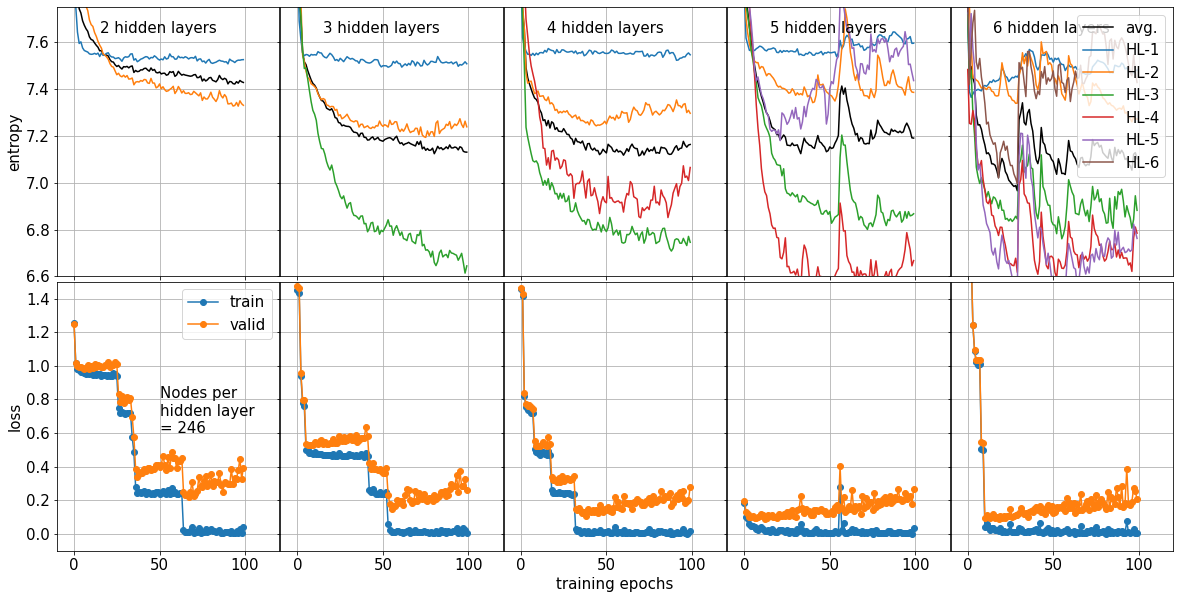

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 15

nw = 0

gs1 = gridspec.GridSpec(2, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4),
              (1,0),(1,1),(1,2),(1,3),(1,4)]
gs1.update(wspace=0.005, hspace=0.02)
for t in range(10):
    if t<5:
        tt=t
    else:
        tt=t-5
    h_layers = layer_optim_entropy_dict[layers_str[tt]].shape[2]
    entropy_cp = layer_optim_entropy_dict[layers_str[tt]] 
    perf_cp = layer_optim_perform_dict[layers_str[tt]]
    avg_entropy_cp = avg_dict[layers_str[tt]]
    if t<5:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([6.6, 7.75])
        ax.set_xlim([-10, 120])
        ax.grid()
        ax.plot(avg_entropy_cp[nw], label="avg.", linestyle='-', color='black')
        for hl in range(h_layers):
            ax.plot(entropy_cp[nw,:,hl], label="HL-" + str(hl+1))
        if t==4:
            ax.legend()
        if t != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("entropy")
        ax.text(15, 7.64, str(t+2) + " hidden layers")
    else:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([-0.1, 1.5])
        ax.set_xlim([-10, 120])
        if tt==2:
            ax.set_xlabel("training epochs")
        label = str(archi_shapes[tt][0])
        ax.plot(perf_cp[nw,:,1], label='train', marker='o')
        ax.plot(perf_cp[nw,:,3], label='valid', marker='o')
        ax.grid()
        if tt != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("loss")
            ax.legend()
            ax.text(50, 0.6, "Nodes per\nhidden layer\n= 246")
            
#plt.savefig("Fig_H_flat_arch.png")
plt.show()


#### Paper Figure 4

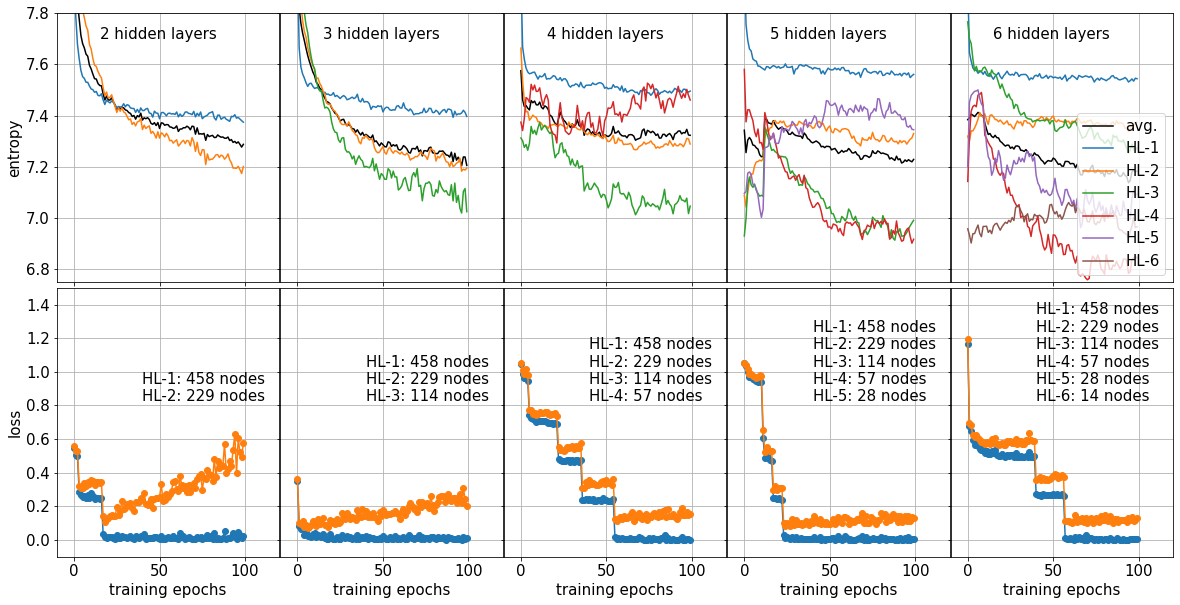

In [13]:
gs1 = gridspec.GridSpec(2, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4),
              (1,0),(1,1),(1,2),(1,3),(1,4)]
gs1.update(wspace=0.005, hspace=0.02)

nw = 1

for t in range(10):
    if t<5:
        tt=t
    else:
        tt=t-5
    h_layers = layer_optim_entropy_dict[layers_str[tt]].shape[2]
    entropy_cp = layer_optim_entropy_dict[layers_str[tt]] 
    perf_cp = layer_optim_perform_dict[layers_str[tt]]
    avg_entropy_cp = avg_dict[layers_str[tt]]
    if t<5:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([6.75, 7.8])
        ax.set_xlim([-10, 120])
        ax.grid()
        ax.plot(avg_entropy_cp[nw], label="avg.", linestyle='-', color='black')
        for hl in range(h_layers):
            ax.plot(entropy_cp[nw,:,hl], label="HL-" + str(hl+1))
        if t==4:
            ax.legend(loc="lower right")
        if t != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("entropy")
        ax.text(15, 7.7, str(t+2) + " hidden layers")
    else:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([-0.1, 1.5])
        ax.set_xlim([-10, 120])
        ax.set_xlabel("training epochs")
        ax.plot(perf_cp[nw,:,1], label='train', marker='o')
        ax.plot(perf_cp[nw,:,3], label='valid', marker='o')
        ax.grid()
        if tt != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("loss")
        nodes_str= ""
        for ind, n in enumerate(archi_shapes[tt][1]):
            nodes_str += ("HL-" + str(ind+1) + ": " + str(n)+" nodes\n")
        ax.text(40, 0.72, nodes_str)
#plt.savefig("Fig_H_contract_arch.png")
plt.show()

#### Figure 5 (tentitive)

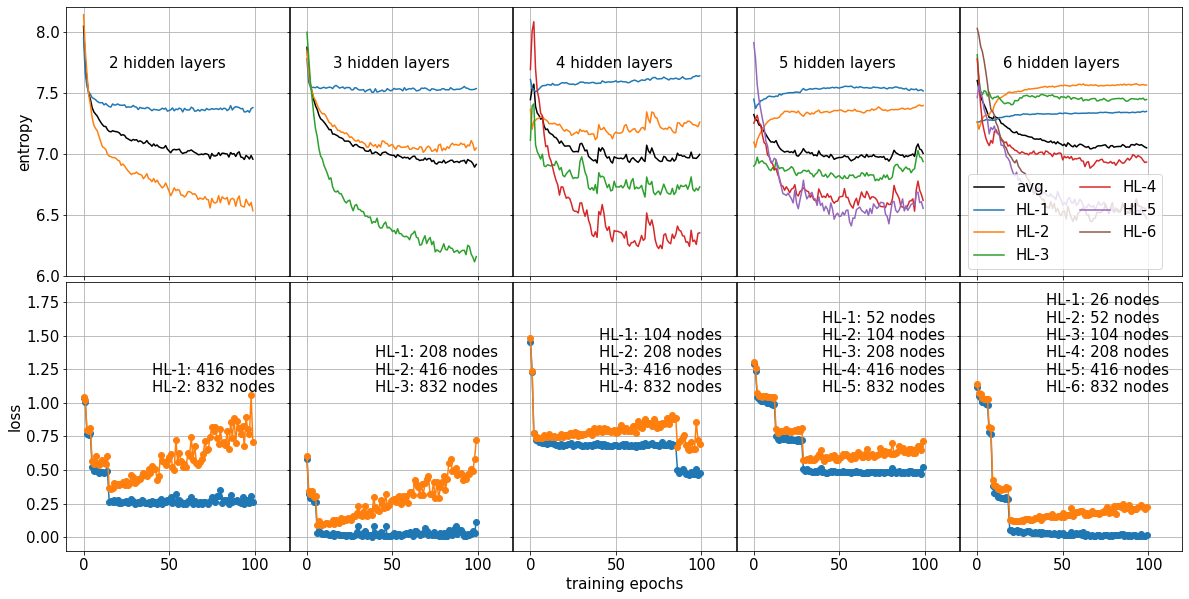

In [27]:
gs1 = gridspec.GridSpec(2, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4),
              (1,0),(1,1),(1,2),(1,3),(1,4)]
gs1.update(wspace=0.005, hspace=0.02)

nw = 2

for t in range(10):
    if t<5:
        tt=t
    else:
        tt=t-5
    h_layers = layer_optim_entropy_dict[layers_str[tt]].shape[2]
    entropy_cp = layer_optim_entropy_dict[layers_str[tt]] 
    perf_cp = layer_optim_perform_dict[layers_str[tt]]
    avg_entropy_cp = avg_dict[layers_str[tt]]
    if t<5:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([6.0, 8.2])
        ax.set_xlim([-10, 120])
        ax.grid()
        ax.plot(avg_entropy_cp[nw], label="avg.", linestyle='-', color='black')
        for hl in range(h_layers):
            ax.plot(entropy_cp[nw,:,hl], label="HL-" + str(hl+1))
        if t==4:
            ax.legend(ncol=2, loc="lower left")
        if t != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("entropy")
        ax.text(15, 7.7, str(t+2) + " hidden layers")
    else:
        ax = plt.subplot(gs1[plot_index[t]])
        ax.set_ylim([-0.1, 1.9])
        ax.set_xlim([-10, 120])
        if tt==2:
            ax.set_xlabel("training epochs")
        ax.plot(perf_cp[nw,:,1], label='train', marker='o')
        ax.plot(perf_cp[nw,:,3], label='valid', marker='o')
        ax.grid()
        if tt != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("loss")
        nodes_str= ""
        for ind, n in enumerate(archi_shapes[tt][nw]):
            nodes_str += ("HL-" + str(ind+1) + ": " + str(n)+" nodes\n")
        ax.text(40, 0.95, nodes_str)
plt.savefig("Fig_H_expand_arch_new.png")
plt.show()